# Python Pandas -1 

Pandas veri bilimini son derece kolay ve etkili hale getiren bir python modülüdür.

In [2]:
import pandas as pd

 hava durumundan oluşan küçük verileri alarak dataframe e aktarmak.   

In [36]:
df= pd.read_csv("weather_data.csv")

In [37]:
df

,day,temperature,windspeed,event
0,1/1/2017,32,6,Rain
1,1/2/2017,35,7,Sunny
2,1/3/2017,28,2,Snow
3,1/4/2017,24,7,Snow
4,1/5/2017,32,4,Rain
5,1/6/2017,31,2,Sunny


Bir Python sözlüğü olarak bulunan veriler de DataFrame olarak kullanılabilir.

In [5]:
weather_data2={
    'day': ['1/1/2017','1/2/2017','1/3/2017'],
    'temperature': [32,35,28],
    'windspeed':[6,7,2],
    'event': ['Rain','Sunny','Snow']
    }
df2= pd.DataFrame(weather_data2)
df2

,day,temperature,windspeed,event
0,1/1/2017,32,6,Rain
1,1/2/2017,35,7,Sunny
2,1/3/2017,28,2,Snow


DataFrame'in boyutlarını görmek için shape() fonksiyonu kullanılır. 
1. satır
2. sütun sayısıdır.
bu özellik Tuple türündedir

In [12]:
df.shape

(6, 4)

DataFrame ile bazı sütun değerlerine isim üzerinden ulaşılabiliyor.

In [13]:
df.columns

Index(['day', 'temperature', 'windspeed', 'event'], dtype='object')

In [17]:
df.event
# veya 
df['event']

0     Rain
1    Sunny
2     Snow
3     Snow
4     Rain
5    Sunny
Name: event, dtype: object

In [19]:
df[['event','temperature']]

,event,temperature
0,Rain,32
1,Sunny,35
2,Snow,28
3,Snow,24
4,Rain,32
5,Sunny,31


In [21]:
# max, min, mean(ortalama), std(standart sapma) özellikleriyle değerler alınabilir 
df.temperature.max() # df['temperature'].max()
df.temperature.mean()

30.333333333333332

In [22]:
# veri kümesinin istatistiklerini yazdırır. int olan veri kümesi için
df.describe()

,temperature,windspeed
count,6.000000,6.000000
mean,30.333333,4.666667
std,3.829708,2.338090
min,24.000000,2.000000
25%,28.750000,2.500000
50%,31.500000,5.000000
75%,32.000000,6.750000
max,35.000000,7.000000


Koşullu oalrak sorgularla veri kümesinden verileri almak.
DataFrame sql sorgularını da destekler. 

In [27]:
df[df.temperature>31] # 31 den büyük olan sıcaklık değerleri listelenir.
df[df.temperature== df.temperature.max()] # max sıcaklığın olduğu satırı listeler.
df[df.temperature < df.temperature.mean()] # ortalama sıcaklıktan küçük olan satırları listeler.

,day,temperature,windspeed,event
2,1/3/2017,28,2,Snow
3,1/4/2017,24,7,Snow


In [29]:
# Bu filtrelemeleri sadece belirli değerler için yapmak istenirse;
df['day'][df.temperature < df.temperature.mean()] # ortalama sıcaklıktan küçük olan günleri listeler.

2    1/3/2017
3    1/4/2017
Name: day, dtype: object

In [38]:
# index değeri istenilen sütuna göre de değiştirilebilir. 
# örneğin gün değeri index olarak görülsün.
# normalde 0 dan 5 e kadar sayılardan oluşuyor.
df.set_index('day') # bu şekilde kaydetmek için inplace=True parametresi kullanılır.

,temperature,windspeed,event
day,,,
1/1/2017,32,6,Rain
1/2/2017,35,7,Sunny
1/3/2017,28,2,Snow
1/4/2017,24,7,Snow
1/5/2017,32,4,Rain
1/6/2017,31,2,Sunny


In [39]:
df # index değerinin değişmediği görülür.

,day,temperature,windspeed,event
0,1/1/2017,32,6,Rain
1,1/2/2017,35,7,Sunny
2,1/3/2017,28,2,Snow
3,1/4/2017,24,7,Snow
4,1/5/2017,32,4,Rain
5,1/6/2017,31,2,Sunny


In [40]:
df.set_index('day', inplace=True)
df # artık kalıcı olarak bu değişmiştir

,temperature,windspeed,event
day,,,
1/1/2017,32,6,Rain
1/2/2017,35,7,Sunny
1/3/2017,28,2,Snow
1/4/2017,24,7,Snow
1/5/2017,32,4,Rain
1/6/2017,31,2,Sunny


In [41]:
# index değerine göre bir satırın verilerini almak için loc kullanılır.
df.loc['1/3/2017']

temperature      28
windspeed         2
event          Snow
Name: 1/3/2017, dtype: object

In [43]:
# bu indexlemeyi resetlemek ve baştaki haline çevirmek için 
df.reset_index(inplace=True)
df

,index,day,temperature,windspeed,event
0,0,1/1/2017,32,6,Rain
1,1,1/2/2017,35,7,Sunny
2,2,1/3/2017,28,2,Snow
3,3,1/4/2017,24,7,Snow
4,4,1/5/2017,32,4,Rain
5,5,1/6/2017,31,2,Sunny


#### Dataframe oluşturmanın farklı yolları bulunuyor.
**CSV kullanmak**
    pd.read_csv("ad.csv")
 
 .    
 .   
 .  
 .
 
    
    
**Excel kullanmak**
    pd.read_excel("ad.xlsx")
    
 .    
 .   
 .  
 .
     
    
**Python sözlüklerden**
    
 weather_data2={
 'day': ['1/1/2017','1/2/2017','1/3/2017'],
 'temperature': [32,35,28],
 'windspeed':[6,7,2],
 'event': ['Rain','Sunny','Snow']
 }
 df= pd.DataFrame(weather_data2)
    
 .    
 .   
 .  
 .   
    
    
**python demet listesinden**
  
 weather_data2=[
 ('1/1/2017',32,6,'Rain'),
 ('1/2/2017',35,7,'Sunny'),
 ('1/3/2017',28,2,'Snow')
 ]
    
  df= pd.DataFrame(weather_data2, columns=["day","temperature","windspeed","event"])
    
 .    
 .   
 .  
 .
 
**Python sözlük listesinden**
    
 weather_data2=[
 {'day':'1/1/2017', 'temperature':32,'windspeed':6, 'event':'Rain'} ,
 {'day':'1/2/2017', 'temperature':35,'windspeed':7, 'event':'Sunny'} ,
 {'day':'1/3/2017', 'temperature':28,'windspeed':2, 'event':'Snow'} ,
 ]
    
 df= pd.DataFrame(weather_data2)

#### CSV üzerinde okuma ve yazma (Read and Write CSV)

In [3]:
df3= pd.read_csv("stock_data.csv")
df3

,tickers,eps,revenue,price,people
0,GOOGLE,27.82,87,845,larry page
1,WMT,4.61,484,65,n.a.
2,MSFT,-1,85,64,bill gates
3,RIL,not avaible,50,1023,mukesh ambani
4,TATA,5.6,-1,n.a.,ratan tata


Veri setinde fazladan bir satır olsa bu durumda okumaya 2. satırdan başlamak gerekir.
ÖR:
 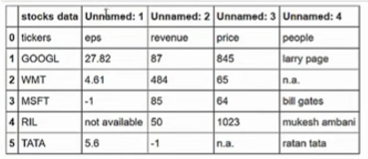
 
Bunun için okuma yaparken skiprows parametresi kullanılır. Buna verilen sayı kadar satır atlar.

**Veri setinin başlıkları olmayabilir ve bunlar okuma sırasında eklenebilir.**
df4= pd.read_csv("stock_data.csv", header=None, names=["baslıklar,"sırayla","eklenir"])
 

**Belirli sayıda satırları okumak için nrows parametresi kullanılır.**
df4= pd.read_csv("stock_data.csv", nrows=3) ilk 3 satırı okuyacaktır

In [8]:
df4= pd.read_csv("stock_data.csv", skiprows=2) # 2 satır aklanarak okur
#pd.read_csv("stock_data.csv", header=1) de aynı işlemi yapacaktır.
df4

,WMT,4.61,484,65,n.a.
0,MSFT,-1,85,64,bill gates
1,RIL,not avaible,50,1023,mukesh ambani
2,TATA,5.6,-1,n.a.,ratan tata


In [9]:
# not avaible ve n.a. gibi değerleri NaN ifadesiyle değiştirmek için na_values parametresi kullanılır.
df4= pd.read_csv("stock_data.csv", na_values=["not avaible","n.a."])
df4

,tickers,eps,revenue,price,people
0,GOOGLE,27.82,87,845.0,larry page
1,WMT,4.61,484,65.0,NaN
2,MSFT,-1.00,85,64.0,bill gates
3,RIL,NaN,50,1023.0,mukesh ambani
4,TATA,5.60,-1,NaN,ratan tata


In [ ]:
# oluşturulan düzenlenen bir dataframe'i kaydetmek için;
df.to_csv('new.csv') 
# şeklinde aynı dosya konumunda yeni bir csv dosyası olarak kaydedilir.

# örn, 2 sütun olarak kaydedilmek istenirse
df.to_csv('new.csv', columns=['tickers','eps']) 
# şeklinde sadece iki sütunu alınarak yeni dosya olarak kaydedilebilir. 


#### Excel verileri okunurken

df= pd.read_excel("dosyaad.xlsx","Sheet1")

**Sheet1 excelde bulunan 1. sayfa anlamındadır. Birden fazla sayfa için bu şekilde okuma yapabilir.**

def convert_people_cell(cell):
    if cell=="n.a.":
        return 'sam walton'
    return cell

df= pd.read_excel("dosyaad.xlsx","Sheet1", converters= {
    'people': convert_people_cell,
    }
)

**Burada convert_people_cell isimli fonksiyona isim hücreleri tek tek gönderilerek n.a. olan değerlerin değiştirilmesi sağlanıyor. people için yapılanlar virgülle eklenerek diğer sütun değerleri için de yapılabilir.**


pd.to_excel("new.xlsx",sheet_name="name") 

**şeklinde yeni excel dosyası olarak kaydedilir.**